In [ ]:
import numpy as np
import math
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import folium

VISUALIZAÇÃO DO MAPA

In [ ]:
mapa = folium.Map(
    location = [-22.5046, -43.1823],
    zoom_start=10
)

In [ ]:
#ponta inferior esquerda: -22.543161606352932, -43.26639483802907
folium.Marker(
    location=[-22.543161606352932, -43.26639483802907],
    popup='<i>-22.543161606352932, -43.26639483802907</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='red')
).add_to(mapa)

In [ ]:
#ponta superior direita: -22.468308146632634, -43.090613595700944
folium.Marker(
    location=[-22.468308146632634, -43.090613595700944],
    popup='<i>-22.468308146632634, -43.090613595700944</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='red')
).add_to(mapa)

In [ ]:
#ponta superior esquerda: -22.471480725131634, -43.26708148350691
folium.Marker(
    location=[-22.471480725131634, -43.26708148350691],
    popup='<i>-22.471480725131634, -43.26708148350691</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='red')
).add_to(mapa)

In [ ]:
#ponta inferior direita: -22.54379578448828, -43.089926950223095
folium.Marker(
    location=[-22.54379578448828, -43.089926950223095],
    popup='<i>-22.54379578448828, -43.089926950223095</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='red')
).add_to(mapa)

In [ ]:
mapa

In [ ]:
#Quitandinha - 1
folium.Marker(
    location=[-22.524907, -43.223916],
    popup='<i>-22.524907, -43.223916</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='blue')
).add_to(mapa)

In [ ]:
#Dr. Thouzet - 2
folium.Marker(
    location=[-22.528328, -43.202885],
    popup='<i>-22.528328, -43.202885</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='blue')
).add_to(mapa)

In [ ]:
#São Sebastião - 3
folium.Marker(
    location=[-22.528328, -43.193240],
    popup='<i>-22.528328, -43.193240</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='blue')
).add_to(mapa)

In [ ]:
#Bingen - 5
folium.Marker(
    location=[-22.512210,	-43.209475],
    popup='<i>-22.512210,	-43.209475</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='blue')
).add_to(mapa)

In [ ]:
#Rua Araruama/Quitandinha - 14
folium.Marker(
    location=[-22.52, -43.22],
    popup='<i>-22.52, -43.22</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='blue')
).add_to(mapa)

In [ ]:
#Rua Amazonas/Quitandinha - 15
folium.Marker(
    location=[-22.529, -43.223],
    popup='<i>-22,529, -43,223</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='blue')
).add_to(mapa)

In [ ]:
#Morin - 16
folium.Marker(
    location=[-22.527, -43.161],
    popup='<i>-22,527, -43,161</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='blue')
).add_to(mapa)

In [ ]:
#Mosela - 20
folium.Marker(
    location=[-22.481, -43.219],
    popup='<i>-22.481, -43.219</i>',
    tooltip='Clique aqui',
    icon=folium.Icon(color='blue')
).add_to(mapa)

* Ao todo são 21 estações, porém na área delimitada só possuem 8

In [ ]:
mapa

In [ ]:
!pip install haversine
from haversine import haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* Area = (18x8)km
* Area total = 144km

In [ ]:
esq_sup = (-22.471480725131634, -43.26708148350691)
esq_inf = (-22.543161606352932, -43.26639483802907)
dir_sup = (-22.468308146632634, -43.090613595700944)
dir_inf = (-22.54379578448828, -43.089926950223095)

In [ ]:
#BASE
b = haversine(esq_inf, dir_inf)
b

18.123130282684006

In [ ]:
#ALTURA
h = haversine(esq_inf, esq_sup)
h

7.970873438413739

Foi definido percorrer 500m em 500m

In [ ]:
bloco_base = 0.500
b /= bloco_base
B = int(b)
B

36

In [ ]:
bloco_altura = 0.500
h /= bloco_altura
H = int(h)
H

15

In [ ]:
#VALOR DO GRID
val_grid = ('36x15')

In [ ]:
x = bloco_base/2
x

0.25

In [ ]:
y = bloco_altura/2
y

0.25

In [ ]:
pontos_centroide = ('0.25km, 0.25km') #para X (cmç em 0.250km e anda de 0.500km em 0.500km), para Y (cmç em 0.250km e anda de 0.500km em 0.500km)

PRÉ - PROCESSAMENTO DOS DADOS

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/15-02-2022/data.csv', sep=';', decimal=',', index_col=False)
#df = df.rename(columns={'longitude':'DATAHORA', 'latitude':'latitude', 'nomeEstacao': 'longitude'})

In [ ]:
df.describe()

,latitude,longitude,valorMedida
count,12994.000000,12994.000000,12994.000000
mean,-43.146612,-22.435940,0.360400
std,0.064907,0.085396,1.326348
min,-43.249000,-22.548000,0.000000
25%,-43.209475,-22.524907,0.000000
50%,-43.134000,-22.427000,0.000000
75%,-43.095000,-22.374000,0.200000
max,-43.046000,-22.258000,33.000000


In [ ]:
df[df['nomeEstacao']=='Vila Rica']['valorMedida'].sum()

156.15

In [ ]:
temp_pattern = 10 #quantas medidas passadas serão usadas para prever as medidas para frente
#batch_size = 1 #corresponde ao valor de amostras que serão processadas em conjunto durante o processo de optimização
NumeroDeModelos = 1 #atributos utilizados

Sem gerador

In [ ]:
x = df[df['nomeEstacao']=='Vila Rica']['valorMedida'].values

In [ ]:
x.shape

(629,)

In [ ]:
listaX = []
listaY = []

for i in range(x.shape[0] - temp_pattern):
  listaX.append(x[i:(i+temp_pattern)])
  listaY.append(x[i+temp_pattern])

In [ ]:
for i in range(len(listaX)):
  listaX[i].shape = (1, temp_pattern)

In [ ]:
len(listaX)

619

In [ ]:
listaX[0].shape

(1, 10)

In [ ]:
np.array(listaY).shape

(619,)

In [ ]:
listaX = np.concatenate(listaX, axis=0)

In [ ]:
listaY = np.array(listaY)

In [ ]:
listaX = np.expand_dims(listaX, axis=-1)

In [ ]:
listaY = np.expand_dims(listaY, axis=-1)

In [ ]:
listaX.shape

(619, 10, 1)

In [ ]:
listaY.shape

(619, 1)

In [ ]:
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.models import Sequential

In [ ]:
Modelo=Sequential()
Modelo.add(LSTM(units=50,return_sequences=True,input_shape=(temp_pattern,NumeroDeModelos)))
Modelo.add(LSTM(units=15,return_sequences=True))
Modelo.add(LSTM(units=13,return_sequences=True))
Modelo.add(LSTM(units=17,return_sequences=True))
Modelo.add(LSTM(units=12,return_sequences=False))
Modelo.add(Dense(NumeroDeModelos,activation='linear'))

In [ ]:
Modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 15)            3960      
                                                                 
 lstm_2 (LSTM)               (None, 10, 13)            1508      
                                                                 
 lstm_3 (LSTM)               (None, 10, 17)            2108      
                                                                 
 lstm_4 (LSTM)               (None, 12)                1440      
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 19,429
Trainable params: 19,429
Non-traina

In [ ]:
from keras.callbacks import ModelCheckpoint

ch=ModelCheckpoint('Pesos.h5',save_best_only=True)

In [ ]:
def RelativeError(y_true,y_pred):
  import keras.backend as K
  epislon=1e-8
  y_true=y_true+epislon
  Erro=100*K.mean(K.abs(  (y_true-y_pred)/y_true))
  return(Erro)

In [ ]:
Modelo.compile(loss='mse',optimizer='adam')

In [ ]:
H=Modelo.fit(listaX,listaY,epochs=10,verbose=1,validation_split=0.3,callbacks=[ch])

Epoch 1/10
14/14 [==============================] - 23s 263ms/step - loss: 0.4947 - val_loss: 0.1535
Epoch 2/10
14/14 [==============================] - 0s 27ms/step - loss: 0.4433 - val_loss: 0.1869
Epoch 3/10
14/14 [==============================] - 0s 28ms/step - loss: 0.4413 - val_loss: 0.1586
Epoch 4/10
14/14 [==============================] - 0s 29ms/step - loss: 0.4374 - val_loss: 0.1731
Epoch 5/10
14/14 [==============================] - 0s 29ms/step - loss: 0.4366 - val_loss: 0.1567
Epoch 6/10
14/14 [==============================] - 0s 31ms/step - loss: 0.4331 - val_loss: 0.1658
Epoch 7/10
14/14 [==============================] - 0s 32ms/step - loss: 0.4328 - val_loss: 0.1580
Epoch 8/10
14/14 [==============================] - 0s 32ms/step - loss: 0.4306 - val_loss: 0.1575
Epoch 9/10
14/14 [==============================] - 0s 33ms/step - loss: 0.4317 - val_loss: 0.1649
Epoch 10/10
14/14 [==============================] - 0s 32ms/step - loss: 0.4320 - val_loss: 0.1547


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
Modelo = load_model('Pesos.h5')

In [ ]:
predicao = Modelo.predict(listaX)

In [ ]:
import matplotlib.pyplot as plt

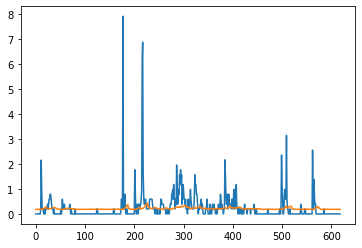

In [ ]:
plt.plot(listaY)
plt.plot(predicao)